In [324]:
import cv2
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt

import scipy
import yaml
import random

In [325]:
count_figures = 0
all_positions_dict = {}
all_figures_dict = {}

In [326]:
# Загрузка параметров из YAML файла
with open('./struct_params.yaml', 'r') as file:
    data = yaml.safe_load(file)

parser:

--frame --params parameters_frame --figures BigCircle SmallCircle --center --figures BigCircle

class Figure: определение фигуры, ее параметры (размеры, расположение, поля, скругления....)

class Frame: определение рамки, ее параметры (расположение рамки, количесвто рамок), фигуры в рамке, отрисовка рамки 

class Center: определение центра, фигуры центра

для рамки сделать:
- определить минимальный гэп между линейными фигурами - с ним влезет максимальное колво
минимальный гэп учитывает обычную тонку границу в пару пикселей
- определить максимальный гэп, с которым влезет минимальное число фигур
- можно если указывается число пользователем рисовать это число или меньше фигур
- если не указывается то выбирать кол-во рандомом
- отрисовывать плохие границы
- добавить другие элементы - ромбы маленькие и большие

для рамки уже сделано:
- посчитаны позиции центра каждой фигуры (угловой и из массивов)
- созданы отдельные массивы для хранения позиций угловых элементов и линейных
- отрисовываются элементы с хорошей границей: по дефолту 88 градусов (то есть 2 пикселя)

СДЕЛАНО:
- класс фигуры
- класс рамки
- класс центра
- отрисовка кругов
- отрисовка хороших границ
- отрисовка плохих границ
- разные типы плохих границ для кругов
- расположение между угловыми элементами
- расположение угловых элементов
- добавлены ромбы
- добавлены квадраты
- добавлены хорошие границы для ромбов
- добавлены хорошие границы для квадратов

СДЕЛАТЬ:
- добавить плохие границы для ромбов
- добавить линии
- добавить плохие границы для линий
- добавить плохие границы для квадратов (почти то же самое что и ромбы)
- разобраться с центром

In [327]:
# будет отвечать только за создание полей класса и отрисовку соответствующей фигуры
count_figures = 0
all_positions_dict = {}
all_figures_dict = {}
class Figure():
    def __init__(self, figure_class):
        self.name = figure_class['FigureClass']
        self.margin = figure_class['figure_params']['margin']
        self.gap = figure_class['figure_params']['gap'] 
        self.num = figure_class['figure_params']['num']
        self.h = figure_class['figure_params']['h']
        self.w = figure_class['figure_params']['w']
        self.radius = figure_class['figure_params']['radius']
        self.color = figure_class['figure_params']['color']
        self.def_angle = figure_class['figure_params']['default_angle']

        if 'Circle' in self.name:
            self.h = 2 * self.radius
            self.w = 2 * self.radius

        self.corner_radius = figure_class['figure_params']['corner radius']
        self.border_width = int((700 / np.tan(np.radians(self.def_angle))) // 12)
        self.border_color = 128     

    
    def draw_circle(self, img, position, is_bad):
        if is_bad:
            bad_type = random.randint(1, 5)

            if bad_type == 1:
                k = random.randint(8, 20)
                l = random.randint(5, 10)
                cv2.ellipse(img, position, (38 - k, 30 - l), random.randint(10, 360), 0, 360, self.border_color, -1)
                cv2.circle(img, position, self.radius + random.randint(0, 10), self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)

            if bad_type == 2:
                k = random.randint(2, 5)
                l = random.randint(2, 5)
                # cv2.ellipse(img, (38 - l, 30 - l), (38 - k, 30 - k), random.randint(10, 360), 0, 360, 128, -1)
                cv2.ellipse(img, position, (38, 30), random.randint(10, 360), 0, 360, self.border_color, -1)
                cv2.circle(img, position, self.radius + random.randint(2, 10), self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)

            if bad_type == 3:
                k = random.randint(8, 20)
                cv2.ellipse(img, position, (38 - k, 30 - k), random.randint(10, 360), 0, 360, self.border_color, -1)
                cv2.circle(img, position, self.radius + random.randint(2, 5), self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)

            if bad_type == 4:
                k = random.randint(8, 15)
                l = random.randint(5, 10)
                # cv2.ellipse(img, position, (38 - k, 30 - l), random.randint(10, 360), 0, 360, self.border_color, -1)
                cv2.circle(img, position, self.radius + random.randint(3, 10), self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)
                cv2.ellipse(img, (position[0] + self.radius, position[1]), (5, 10), 0, 0, 360, self.border_color, -1)

            if bad_type == 5:
                k = random.randint(3, 10)
                cv2.circle(img, position, self.radius + k, self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)

            if bad_type == 6:
                k = random.randint(8, 15)
                l = random.randint(5, 10)
                # cv2.ellipse(img, position, (38 - k, 30 - l), random.randint(10, 360), 0, 360, self.border_color, -1)
                cv2.circle(img, position, self.radius + random.randint(3, 10), self.border_color, -1)
                cv2.circle(img, position, self.radius, self.color, -1)
                cv2.ellipse(img, (position[0], position[1] + self.radius), (5, 10), 0, 0, 360, self.border_color, -1)
        else:
            # img = self.draw_circle_bad(img, position)
            cv2.circle(img, position, self.radius + self.border_width, self.border_color, -1)
            cv2.circle(img, position, self.radius, self.color, -1)

        return img

    def draw_rect(self, img, position, is_bad):
        if is_bad:
            print('ew')
        else:
            # vertices
            vertices1 = np.array([
                                [position[0] - self.h // 2 + self.corner_radius, position[1] - self.w // 2],
                                [position[0] + self.h // 2 - self.corner_radius, position[1] - self.w // 2 ],
                                [position[0] + self.h // 2 - self.corner_radius, position[1] + self.w // 2],
                                [position[0] - self.h // 2 + self.corner_radius, position[1] + self.w // 2]
                            ])
            vertices1_border = np.array([
                                [vertices1[0][0] - self.border_width, vertices1[0][1] - self.border_width],
                                [vertices1[1][0] + self.border_width, vertices1[1][1] - self.border_width],
                                [vertices1[2][0] + self.border_width, vertices1[2][1] + self.border_width],
                                [vertices1[3][0] - self.border_width, vertices1[3][1] + self.border_width]
                            ])

            vertices2 = np.array([
                                [position[0] - self.h // 2, position[1] - self.w // 2 + self.corner_radius],
                                [position[0] + self.h // 2, position[1] - self.w // 2 + self.corner_radius],
                                [position[0] + self.h // 2, position[1] + self.w // 2 - self.corner_radius],
                                [position[0] - self.h // 2, position[1] + self.w // 2 - self.corner_radius]
                            ])

            vertices2_border = np.array([
                                [vertices2[0][0] - self.border_width, vertices2[0][1] - self.border_width],
                                [vertices2[1][0] + self.border_width, vertices2[1][1] - self.border_width],
                                [vertices2[2][0] + self.border_width, vertices2[2][1] + self.border_width],
                                [vertices2[3][0] - self.border_width, vertices2[3][1] + self.border_width]
                            ])

            corner_points = np.array([
                                [position[0] - self.h // 2 + self.corner_radius, position[1] - self.w // 2 + self.corner_radius],
                                [position[0] + self.h // 2 - self.corner_radius, position[1] - self.w // 2 + self.corner_radius],
                                [position[0] + self.h // 2 - self.corner_radius, position[1] + self.w // 2 - self.corner_radius],
                                [position[0] - self.h // 2 + self.corner_radius, position[1] + self.w // 2 - self.corner_radius]
                            ])
            if 'Rhomb' in self.name:
                angle_rad = np.deg2rad(45)
                rotation_matrix = cv2.getRotationMatrix2D((position[0], position[1]), np.rad2deg(angle_rad), 1)
                vertices1 = cv2.transform(np.array([vertices1]), rotation_matrix)[0]
                vertices2 = cv2.transform(np.array([vertices2]), rotation_matrix)[0]
                vertices1_border = cv2.transform(np.array([vertices1_border]), rotation_matrix)[0]
                vertices2_border = cv2.transform(np.array([vertices2_border]), rotation_matrix)[0]
                corner_points = cv2.transform(np.array([corner_points]), rotation_matrix)[0]

            img = self.rect(img, vertices1_border, vertices2_border, corner_points, self.border_color, True)
            img = self.rect(img, vertices1, vertices2, corner_points, self.color, False)

        return img
            
    def rect(self, img, vert1, vert2, corner_vert, color, is_border):
        if not is_border:
            cv2.fillConvexPoly(img, vert1.astype(int), color)
            cv2.fillConvexPoly(img, vert2.astype(int), color)
            for corner_point in corner_vert:
                cv2.circle(img, (int(corner_point[0]), int(corner_point[1])), self.corner_radius, color, thickness=cv2.FILLED)
        else:
            cv2.fillConvexPoly(img, vert1.astype(int), color)
            cv2.fillConvexPoly(img, vert2.astype(int), color)
            for corner_point in corner_vert:
                cv2.circle(img, (int(corner_point[0]), int(corner_point[1])), self.corner_radius + self.border_width, color, thickness=cv2.FILLED)
        return img


    def draw(self, img, position, bad_border):
        if 'Circle' in self.name:
            img = self.draw_circle(img, position, bad_border)

        if 'Square' in self.name or 'Rhomb' in self.name:
            img = self.draw_rect(img, position, bad_border)
            
        
        return img

In [328]:

class Frame():
    def __init__(self, img, edge_figure, linear_figure, num_linear_x, num_linear_y):
        global count_figures
        global all_positions_dict
        global all_figures_dict
        count_figures = count_figures
        all_positions_dict = all_positions_dict
        all_figures_dict = all_figures_dict

        marg_hor = np.arange(20, 80, 10)
        marg_vert = np.arange(50, 110, 10)
        marg_ind = random.randint(0, len(marg_hor))
        self.frame_margin_hor = 20
        self.frame_margin_vert = 50

        self.lin_name = linear_figure.name
        self.edge_name = edge_figure.name
        num_bad = random.randint(0, 20)


        # self.frame_y = img.shape[0] # высота изобр
        # self.frame_x = img.shape[1] # ширина изобр

        # ИСПРАВИТЬ должно вычетаться два марджина
        self.frame_y = img.shape[0] - 2*self.frame_margin_vert # высота изобр
        self.frame_x = img.shape[1] - 2*self.frame_margin_hor # ширина изобр

        self.num_linear_x = num_linear_x # колво фигур в массиве горизонтальном
        self.num_linear_y = num_linear_y    # колво фигур в массиве вертикальном
        
        self.num_edges = 4
        self.edge_figure = edge_figure # фигура в углах рамки - объект класса Figure
        self.linear_figure = linear_figure  # фигура в массивах - объект класса Figure

        # координаты угловых фигур
        self.edge_positions, count_figures, all_positions_dict, all_figures_dict =  \
                                                                    self.calculate_edge_positions(edge_figure, count_figures, \
                                                                    all_positions_dict, all_figures_dict)
        print(self.edge_positions)
        
        self.hor_size = (self.frame_x - edge_figure.w - edge_figure.margin) - \
            (0+edge_figure.w + edge_figure.margin)
        self.vert_size = (self.frame_y - edge_figure.h - edge_figure.margin) - \
            (0+edge_figure.h + edge_figure.margin)
        self.start_point = (edge_figure.h + edge_figure.margin, \
                            edge_figure.w + edge_figure.margin)

        self.gap_hor = (((((self.frame_x - edge_figure.w) - \
                           (0+edge_figure.w)))//self.num_linear_x) - linear_figure.w)

        self.gap_vert = (((((self.frame_y - edge_figure.h) - \
                            (0+edge_figure.h)))//self.num_linear_y) - linear_figure.h)
        

        # self.gap_from_edge_figure_hor = self.edge_figure.h//2 + self.linear_figure.h//2 + self.linear_figure.gap//2
        # self.gap_from_edge_figure_vert = self.edge_figure.w//2 + self.linear_figure.w//2 + self.linear_figure.gap//2
        self.gap_from_edge_figure_hor = self.edge_figure.h//2 + self.linear_figure.h//2 + self.linear_figure.gap
        self.gap_from_edge_figure_vert = self.edge_figure.w//2 + self.linear_figure.w//2 + self.linear_figure.gap

        # позиции всех линейных фигур: вертикаль и горизонталь
        self.all_lin_positions = []
        self.linear_top_pos, self.all_lin_positions, count_figures, all_positions_dict, all_figures_dict = \
            self.calculate_lin_positions(linear_figure,self.edge_positions[0], self.edge_positions[2], [], \
                                self.all_lin_positions, self.num_linear_x, 'hor', count_figures, all_positions_dict, all_figures_dict)
        
        self.linear_bottom_pos, self.all_lin_positions, count_figures, all_positions_dict, all_figures_dict = \
            self.calculate_lin_positions(linear_figure,self.edge_positions[3], self.edge_positions[2], [], \
                                self.all_lin_positions, self.num_linear_x, 'hor', count_figures, all_positions_dict,all_figures_dict)

        self.linear_left_pos, self.all_lin_positions, count_figures, all_positions_dict, all_figures_dict = \
            self.calculate_lin_positions(linear_figure,self.edge_positions[0], self.edge_positions[3], [], \
                                self.all_lin_positions, self.num_linear_y, 'vert', count_figures, all_positions_dict, all_figures_dict)
        
        self.linear_right_pos, self.all_lin_positions, count_figures, all_positions_dict, all_figures_dict = \
            self.calculate_lin_positions(linear_figure,self.edge_positions[2], self.edge_positions[1], [], \
                                self.all_lin_positions, self.num_linear_y, 'vert', count_figures, all_positions_dict, all_figures_dict)


        self.positions = self.edge_positions + self.all_lin_positions
        self.bad_ind = random.sample(range(len(all_positions_dict)), num_bad)

        self.bad_position = [all_positions_dict[ind] for ind in self.bad_ind]
        self.bad_type = [all_figures_dict[ind] for ind in self.bad_ind]
        
        
    def calculate_edge_positions(self, edge_figure, count_figures, all_positions_dict, all_figures_dict):
        self.top_left = (self.frame_margin_hor + edge_figure.h // 2, self.frame_margin_vert + edge_figure.w // 2) # координата центра верхней левой
        self.bottom_right = (self.frame_x +  self.frame_margin_hor - edge_figure.h // 2, \
                             self.frame_y + self.frame_margin_vert - edge_figure.w // 2)    # координата центра правой нижней

        self.top_right = (self.frame_x +  self.frame_margin_hor - edge_figure.h // 2, \
                          self.frame_margin_vert + edge_figure.w // 2)  # координата центра правой верхней
        self.bottom_left = (self.frame_margin_hor + edge_figure.h // 2, \
                            self.frame_y + self.frame_margin_vert - edge_figure.w // 2) # координата центра левой нижней


        self.edge_positions = [self.top_left, self.bottom_right, self.top_right, self.bottom_left] # позиции угловых фигур

        all_positions_dict[count_figures] = self.top_left
        all_positions_dict[count_figures+1] = self.bottom_right
        all_positions_dict[count_figures+2] = self.top_right
        all_positions_dict[count_figures+3] = self.bottom_left

        all_figures_dict[count_figures] = edge_figure.name
        all_figures_dict[count_figures+1] = edge_figure.name
        all_figures_dict[count_figures+2] = edge_figure.name
        all_figures_dict[count_figures+3] = edge_figure.name

        count_figures = count_figures + 3

        return self.edge_positions, count_figures, all_positions_dict, all_figures_dict


    def calculate_lin_positions(self, linear_figure, start_pos, end_pos, lin_positions, all_lin_pos, num, \
                                direction, count_figures, all_positions_dict, all_figures_dict):
        if direction == 'hor':
            start_hor = start_pos[0] + self.gap_from_edge_figure_hor
            end_hor = end_pos[0] - self.gap_from_edge_figure_hor
            lin_pos_hor = np.linspace(start_hor, end_hor, num)
            start_vert = start_pos[1]
            for i in range(num):
                pos_hor = int(lin_pos_hor[i])
                pos_vert = start_vert
                lin_positions.append((pos_hor, pos_vert))
                all_lin_pos.append((pos_hor, pos_vert))
                count_figures += 1
                all_positions_dict[count_figures] = (pos_hor, pos_vert)
                all_figures_dict[count_figures] = linear_figure.name

        if direction == 'vert':
            start_hor = start_pos[0]
            start_vert = start_pos[1] + self.gap_from_edge_figure_vert
            end_vert = end_pos[1] - self.gap_from_edge_figure_vert
            lin_pos_vert = np.linspace(start_vert, end_vert, num)
            for i in range(num):
                pos_hor = start_hor
                pos_vert = int(lin_pos_vert[i])
                lin_positions.append((pos_hor, pos_vert))
                all_lin_pos.append((pos_hor, pos_vert))
                count_figures += 1
                all_positions_dict[count_figures] = (pos_hor, pos_vert)
                all_figures_dict[count_figures] = linear_figure.name

        return lin_positions, all_lin_pos, count_figures, all_positions_dict, all_figures_dict


    def draw_frame(self, img):
        for i, position in enumerate(self.positions):
            if all_figures_dict[i] == self.lin_name:
                if i in self.bad_ind:
                    img = self.linear_figure.draw(img, position, True)
                else:
                    img = self.linear_figure.draw(img, position, False)

            if all_figures_dict[i] == self.edge_name:
                if i in self.bad_ind:
                    img = self.edge_figure.draw(img, position, True)
                else:
                    img = self.edge_figure.draw(img, position, False)
    
    def get_frame_size(self):
        frame_size = (self.vert_size, self.hor_size)
        start_point = self.start_point
        return frame_size, start_point


In [329]:
class Center():
    def __init__(self, start_point, size, figures, nums):
        self.start_point = start_point
        self.size = size
        self.figures = figures
        self.nums_figures = nums

        self.nums_at_all  = np.sum(nums)

        if self.nums_at_all % 3 == 0 and self.nums_at_all % 2:
            self.size_s_hor = self.size[1] // 3
            self.size_s_vert = self.size[0] // 2
            self.num_hor = 3
            self.num_vert = 2

        elif self.nums_at_all == 2:
            self.size_s_hor = self.size[1] // 2
            self.size_s_vert = self.size[0]
            self.num_hor = 2
            self.num_vert = 1
            
        elif self.nums_at_all % 2 == 0 and self.nums_at_all % 3 != 0:
            self.size_s_hor = self.size[1] // 2
            self.size_s_vert = self.size[0] // 2
            self.num_hor = 2
            self.num_vert = 2

        elif self.nums_at_all % 4 == 0 and self.nums_at_all % 3 == 0:
            self.size_s_hor = self.size[1] // 4
            self.size_s_vert = self.size[0] // 3
            self.num_hor = 4
            self.num_vert = 3

        elif self.nums_at_all % 4 == 0 and self.nums_at_all % 5 == 0:
            self.size_s_hor = self.size[1] // 5
            self.size_s_vert = self.size[0] // 4
            self.num_hor = 5
            self.num_vert = 4

        elif self.nums_at_all % 4 == 0 and self.nums_at_all // 4 > 1:
            self.size_s_vert = self.size[0] // 4
            self.size_s_hor = self.size[1] // self.size_s_vert
            self.num_hor = self.size_s_vert
            self.num_vert = 4

        elif self.nums_at_all == 1:
            self.size_s_hor = self.size[1]
            self.size_s_vert = self.size[0]
            self.num_hor = 1
            self.num_vert = 1

    def draw_center_figure(self, img):
        start_hor = self.start_point[1]
        start_vert = self.start_point[0]
        for hor_figures in range(self.num_hor):
            for i in self.nums_figures:
                for figure in self.figures:
                    center_hor = (start_hor + start_hor + self.size_s_hor) // 2
                    center_vert = (start_vert + start_vert + self.size_s_vert) // 2
                    figure.draw(img, (center_hor, center_vert), False)
                    start_hor = start_hor + self.size_s_hor
                self.nums_figures[self.nums_figures.index(i)] -= 1 

        start_hor = self.start_point[1]
        start_vert = self.start_point[0] + self.size_s_vert
        for hor_figures in range(self.num_hor):
            for i in self.nums_figures:
                if i != 0:
                    for figure in self.figures:
                        center_hor = (start_hor + start_hor + self.size_s_hor) // 2
                        center_vert = (start_vert + start_vert + self.size_s_vert) // 2
                        figure.draw(img, (center_hor, center_vert), False)
                        start_hor = start_hor + self.size_s_hor
                    self.nums_figures[self.nums_figures.index(i)] -= 1

        

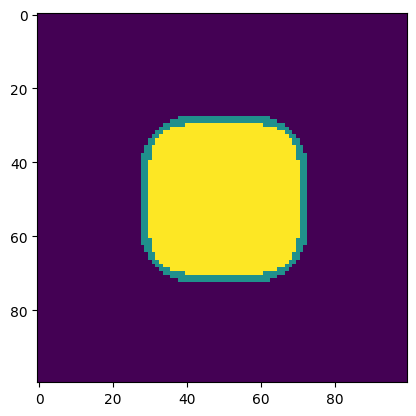

In [330]:
image = np.zeros((100, 100, 1), dtype=np.uint8)

square = Figure(data['figures'][2])
square.draw(image, (50, 50), False)
plt.imshow(image)

[(70, 100), (954, 668), (954, 100), (70, 668)]


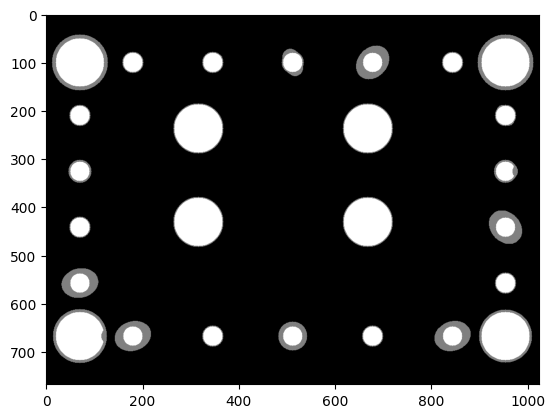

True

In [331]:
img = np.zeros((768, 1024), dtype=np.float32)
small_circle = Figure(data['figures'][0])
big_circle = Figure(data['figures'][1])


frame1 = Frame(img, big_circle, small_circle, 5, 4)
frame1.draw_frame(img)
frame1_size, start_center = frame1.get_frame_size()
center1 = Center(start_center, frame1_size, [Figure(data['figures'][1])], [4])
center1.draw_center_figure(img)
plt.imshow(img, cmap='gray')
plt.show()

cv2.imwrite('./input_mask.png', img)

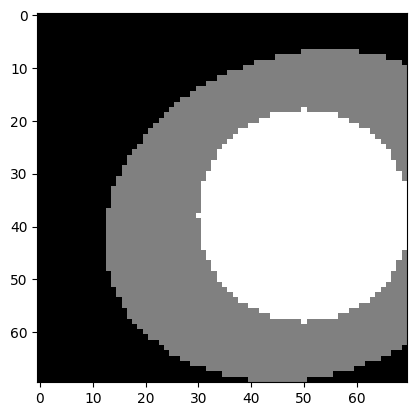

In [332]:
crop = img[630:700, 130:200]

plt.imshow(crop, cmap='gray')

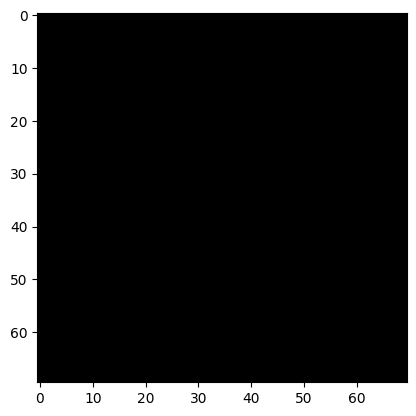

In [316]:
crop_def = np.zeros_like(crop)

# varian 1
# k = random.randint(8, 20)
# l = random.randint(5, 10)
# cv2.ellipse(crop_def, (38, 30), (38 - k, 30 - l), random.randint(10, 360), 0, 360, 128, -1)
# cv2.circle(crop_def, (38, 30), 20 + random.randint(0, 10), 128, -1)
# cv2.circle(crop_def, (38, 30), 20, 255, -1)

# varian 2
# k = random.randint(8, 20)
# l = random.randint(5, 10)
# cv2.ellipse(crop_def, (38 - l, 30 - l), (38 - k, 30 - k), random.randint(10, 360), 0, 360, 128, -1)
# cv2.circle(crop_def, (38, 30), 20 + random.randint(2, 10), 128, -1)
# cv2.circle(crop_def, (38, 30), 20, 255, -1)

# variant 3
# k = random.randint(8, 20)
# cv2.ellipse(crop_def, (38, 30), (38 - k, 30 - k), random.randint(10, 360), 0, 360, 128, -1)
# cv2.circle(crop_def, (38, 30), 20 + random.randint(2, 5), 128, -1)
# cv2.circle(crop_def, (38, 30), 20, 255, -1)

# variant 4
# k = random.randint(8, 15)
# l = random.randint(5, 10)
# cv2.ellipse(crop_def, (38, 30), (38 - k, 30 - l), random.randint(10, 360), 0, 170, 128, -1)
# cv2.circle(crop_def, (38, 30), 20, 255, -1)
# cv2.ellipse(crop_def, (38 + 20, 30), (5, 10), 0, 0, 360, 128, -1)


plt.imshow(crop_def, cmap='gray')